In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv('/Users/Corentin/Desktop/statapp/df_merge_2.csv', low_memory=False, index_col='Unnamed: 0')

df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d', errors = 'ignore')
df['sender_birth_date'] = pd.to_datetime(df.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df['receiver_birth_date'] = pd.to_datetime(df.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

df.sort_values(by='timestamp', ascending=True, inplace=True)

print(df['is_alert_pooled'].value_counts())

def filter_df(time, df_to_filter):
    " Fonction qui renvoie un df trié en ne prenant que les dates du passé "
    " mettre le time sous forme 'yyyy-mm-dd' "
    df_1 = df_to_filter[df_to_filter['timestamp']<time].copy()
    return df_1

False    1082018
True        1380
Name: is_alert_pooled, dtype: int64


In [5]:
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',

       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',

       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',

       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',

       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 

       'ecarts_tx_received_A','ecarts_tx_received_B', 
       'ecarts_tx_sent_A', 'ecarts_tx_sent_B',

       'sender_bank_id','receiver_bank_id',

       'is_alert_solo', 'is_alert_pooled']

variables_to_drop = ['tx_id', 'sender_account_id', 'receiver_account_id', 'sender_first_name',
       'sender_last_name', 'sender_zip_code', 'receiver_first_name',
       'receiver_last_name', 'receiver_zip_code']

df_bis=df[variables_to_keep].copy()

In [6]:
df_bis['is_alert_pooled']= df_bis['is_alert_pooled'].apply( lambda x : int(x))
df_bis['is_alert_solo']= df_bis['is_alert_solo'].apply( lambda x : int(x))

#Variable catégorielle tx_type

tx_type_ = pd.get_dummies(df_bis['tx_type'],drop_first=True)
df_bis= pd.concat([df_bis, tx_type_], axis=1)
df_bis.drop(['tx_type'],axis=1,inplace=True)
df_bis.rename(columns={'WIRE': 'tx_type', 
                           }, inplace=True)
df_bis.head(3)

,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,is_alert_pooled,tx_type
353529,9.73,2018-03-03,FR,1948-11-25,FR,1949-08-02,62,3,2018,3,...,NaN,0.000000,NaN,0.0,NaN,C,A,0,0,1
216521,141.02,2018-03-03,TH,1928-07-05,FR,1948-12-01,62,3,2018,3,...,NaN,-33.607966,NaN,0.0,NaN,C,A,0,0,0
981964,155.96,2018-03-03,FR,1944-02-01,FR,1958-08-15,62,3,2018,3,...,0.972222,NaN,594.390027,NaN,19.812553,C,B,0,0,1


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
L=['sender_country_code','receiver_country_code', 'sender_bank_id','receiver_bank_id']
for i in L: 
    le.fit(df_bis[i])
    le.classes_
    df_bis[i]= le.transform(df_bis[i])
    display(pd.DataFrame(index= [j for j in range(len(df_bis[i].unique()))],
                         data=le.inverse_transform([j for j in range(len(df_bis[i].unique()))]), columns= [i]))
    

,sender_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
75,YE
76,ZA
77,ZM
78,ZW


,receiver_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
78,YE
79,ZA
80,ZM
81,ZW


,sender_bank_id
0,A
1,B
2,C


,receiver_bank_id
0,A
1,B
2,C


In [8]:
# On enlève les transactions avec un montant nul 
df_bis = df_bis.drop(df_bis[df_bis.tx_amount==0].index)
df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)

for i in ['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']: 
    df_bis[i]=df_bis[i].fillna(0)

for i in ['reliability_receiver_A','reliability_receiver_B','reliability_sender_A', 'reliability_sender_B']:
    df_bis[i]=df_bis[i].fillna(1)
    
for i in ['ecarts_tx_received_A','ecarts_tx_received_B','ecarts_tx_sent_A', 'ecarts_tx_sent_B']:
    df_bis[i]=df_bis[i].fillna(0)



for i in ['median_cum_sender_B','mean_cum_sender_B','median_cum_receiver_B','mean_cum_receiver_B', 'median_cum_sender_A','mean_cum_sender_A','median_cum_receiver_A','mean_cum_receiver_A']:
    df_bis[i]=df_bis[i].fillna(df_bis['tx_amount'])


df_bis[['variance_cum_sender_B', 'variance_cum_receiver_B']]= df_bis[['variance_cum_sender_B', 'variance_cum_receiver_B']].fillna(0)
df_bis[['variance_cum_sender_A', 'variance_cum_receiver_A']]= df_bis[['variance_cum_sender_A', 'variance_cum_receiver_A']].fillna(0)

df_bis[['nb_is_alert_solo_receiver_A','nb_is_alert_solo_sender_A']]= df_bis[['nb_is_alert_solo_receiver_A','nb_is_alert_solo_sender_A']].fillna(0)
df_bis[['nb_is_alert_solo_receiver_B','nb_is_alert_solo_sender_B']]= df_bis[['nb_is_alert_solo_receiver_B','nb_is_alert_solo_sender_B']].fillna(0)

#Écart
df_bis['ecarts_tx_received_A']= (df_bis.tx_amount - df_bis.median_cum_receiver_A)/df_bis.median_cum_receiver_A*100
df_bis['ecarts_tx_received_B']= (df_bis.tx_amount - df_bis.median_cum_receiver_B)/df_bis.median_cum_receiver_B*100
df_bis['ecarts_tx_sent_A']= (df_bis.tx_amount - df_bis.median_cum_sender_A)/df_bis.median_cum_sender_A*100
df_bis['ecarts_tx_sent_B']= (df_bis.tx_amount - df_bis.median_cum_sender_B)/df_bis.median_cum_sender_B*100

df_bis = df_bis.replace([np.inf, -np.inf], np.nan)

# supprimer les lignes avec des valeurs manquantes (NaN)
df_bis.dropna(inplace=True)

df_bis[df_bis.isnull().any(axis=1)]

/var/folders/ls/kz9r5k393xg8d3p1krqjx50m0000gn/T/ipykernel_63112/3937694547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)


,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,is_alert_pooled,tx_type


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression

In [10]:
num_cols= ['tx_amount',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B']

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'is_alert_solo', 'tx_type']

In [11]:
import datetime 

def train_test_split_time(df_to_split,time,delta):
    " fonction qui prend en arg un data frame à split, une date à partir de laquelle on sépare train et test, ainsi qu'un horizon "

    time_delta = time + datetime.timedelta(days=delta)
    df = filter_df(time, df_to_split)

    X_train=df.drop(['is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
    y_train= df['is_alert_pooled']

    df4 = df_to_split[(df_to_split.timestamp<time_delta)&(df_to_split.timestamp>=time)]
    X_test = df4.drop(['is_alert_pooled','is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
    y_test = df4['is_alert_pooled']
    print("% Test/(Test + Train) : "+  str(len(X_test)/(len(X_train)+len(X_test))*100))

    return(X_train, X_test, y_train, y_test)

def prep_train_test(df_to_split, time, delta, scaler_, SMote):
    "fonction qui renvoie juste X_train, X_test, y_train, y_test "
    "scaler_: le scaler à utiliser, mettre 'False' si on ne veut pas scaler "
    "SMote : True ou False"

    X_train, X_test, y_train, y_test = train_test_split_time(df_to_split,time,delta)


    #Resampling 
    if SMote == True : 
        
        print('Original dataset shape %s' % Counter(y_train))
        sm = SMOTE(sampling_strategy= 0.3) #rapport classe minoritaire sur classe majoritaire
        X_train, y_train = sm.fit_resample(X_train, y_train)
        print('Resampled dataset shape %s' % Counter(y_train))

    #Scaling
    if scaler_ != False : 
        scaler=scaler_
        #X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
        #X_test= scaler.transform(X_test)
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]),index=X_train.index, columns= num_cols)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]),index=X_test.index, columns= num_cols)

        X_train = pd.concat([X_train_scaled,X_train[cat_cols]],axis=1)
        X_test = pd.concat([X_test_scaled,X_test[cat_cols]],axis=1)
    return(X_train, X_test, y_train, y_test)

In [12]:
def evaluation_classifier(df_to_split, time, delta, scaler_, classifier, SMote, feature_importance, affichage):
    "fonction pipeline qui met tous les éléments bout à bout"
    "scaler_: le scaler à utiliser, mettre 'False' si on ne veut pas scaler "
    "classifier : classifier à utiliser "
    "SMote : True ou False"
    "feature_importance : True ou False"
    "affichage : True ou False"
    #X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split_time(df_to_split,time,delta)


    #Resampling 
    if SMote == True : 
        
        print('Original dataset shape %s' % Counter(y_train))
        sm = SMOTE(sampling_strategy= 0.3) #rapport classe minoritaire sur classe majoritaire
        X_train, y_train = sm.fit_resample(X_train, y_train)
        print('Resampled dataset shape %s' % Counter(y_train))

    #Scaling
    if scaler_ != False : 
        scaler=scaler_
        #X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
        #X_test= scaler.transform(X_test)
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]),index=X_train.index, columns= num_cols)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]),index=X_test.index, columns= num_cols)

        X_train = pd.concat([X_train_scaled,X_train[cat_cols]],axis=1)
        X_test = pd.concat([X_test_scaled,X_test[cat_cols]],axis=1)
    X_t= X_train.copy()

    #Entrainement du modèle et prédictions
    model=classifier
    model.fit(X_train, y_train) 
    predictions= model.predict(X_test)
    if affichage== True: 
        print('train')
        print(classification_report(y_train,model.predict(X_train)))
        print('test')
        print(classification_report(y_test,predictions))
        sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
    
    #Affichage du recall
    

    #Affichage des paramètres du modèle
    #print(model.best_params_)

    #Affichage des features importances
    if feature_importance == True: 
        importances = model.feature_importances_
        indices = np.argsort(importances)
        fig, ax = plt.subplots(figsize=(7,8))
        ax.barh(range(len(importances)), importances[indices]*100)
        ax.set_yticks(range(len(importances)), colors='royalblue')
        _ = ax.set_yticklabels(np.array(X_t.columns)[indices])
        plt.grid()
        plt.title("Importance de chacune des features sur is_alert_pooled en %")
        plt.show() 





    return([recall_score(y_test, predictions , pos_label=1, average='binary'), f1_score(y_test, predictions , pos_label=1, average='binary'), precision_score(y_test, predictions , pos_label=1, average='binary')])

# Reg log 

% Test/(Test + Train) : 27.411975868540644


/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    619589
           1       0.40      0.04      0.07       786

    accuracy                           1.00    620375
   macro avg       0.70      0.52      0.54    620375
weighted avg       1.00      1.00      1.00    620375

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    234001
           1       0.86      0.02      0.04       276

    accuracy                           1.00    234277
   macro avg       0.93      0.51      0.52    234277
weighted avg       1.00      1.00      1.00    234277



[0.021739130434782608, 0.04240282685512367, 0.8571428571428571]

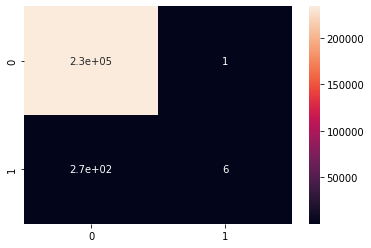

In [11]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300
evaluation_classifier(df_bis, time, delta, StandardScaler(), LogisticRegression(), False, False, True)

# Random Forest 

% Test/(Test + Train) : 27.411975868540644
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    619589
           1       1.00      1.00      1.00       786

    accuracy                           1.00    620375
   macro avg       1.00      1.00      1.00    620375
weighted avg       1.00      1.00      1.00    620375

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    234001
           1       0.82      0.79      0.80       276

    accuracy                           1.00    234277
   macro avg       0.91      0.89      0.90    234277
weighted avg       1.00      1.00      1.00    234277



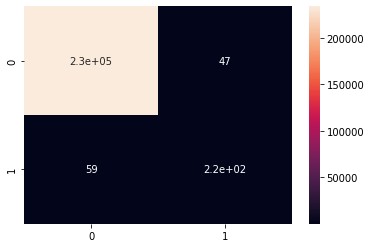

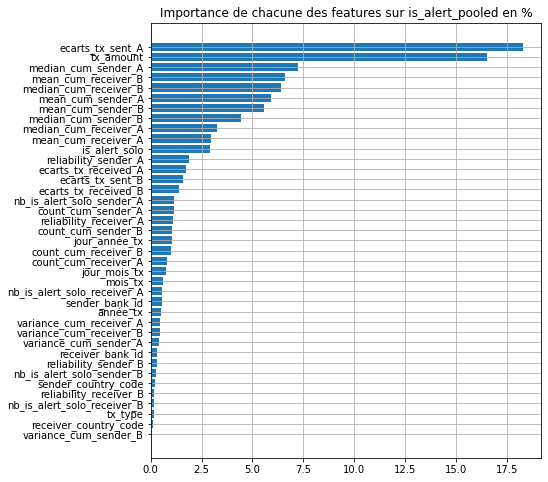

In [12]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300

a = evaluation_classifier(df_bis, time, delta, StandardScaler(), RandomForestClassifier(), False, True, True)

% Test/(Test + Train) : 27.411975868540644
Original dataset shape Counter({0: 619589, 1: 786})
Resampled dataset shape Counter({0: 619589, 1: 185876})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    619589
           1       1.00      1.00      1.00    185876

    accuracy                           1.00    805465
   macro avg       1.00      1.00      1.00    805465
weighted avg       1.00      1.00      1.00    805465

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    234001
           1       0.79      0.79      0.79       276

    accuracy                           1.00    234277
   macro avg       0.89      0.89      0.89    234277
weighted avg       1.00      1.00      1.00    234277



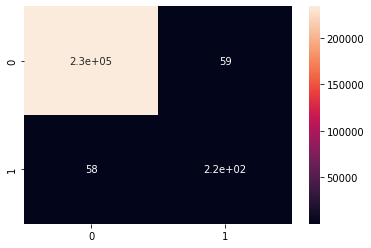

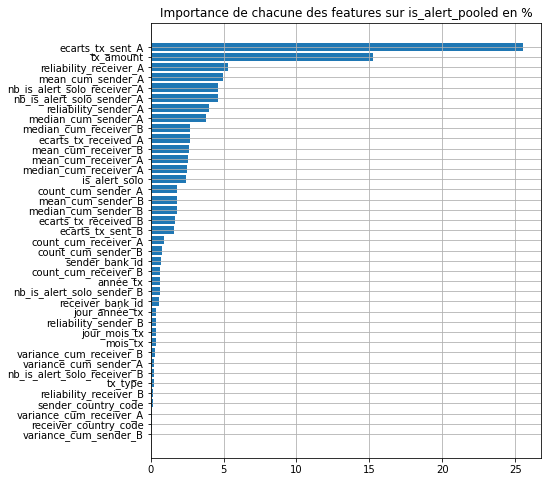

In [13]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300

a = evaluation_classifier(df_bis, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

In [35]:
import xgboost as xgb

# XGB

% Test/(Test + Train) : 27.411975868540644
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    619589
           1       1.00      1.00      1.00       786

    accuracy                           1.00    620375
   macro avg       1.00      1.00      1.00    620375
weighted avg       1.00      1.00      1.00    620375

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    234001
           1       0.92      0.79      0.85       276

    accuracy                           1.00    234277
   macro avg       0.96      0.90      0.93    234277
weighted avg       1.00      1.00      1.00    234277



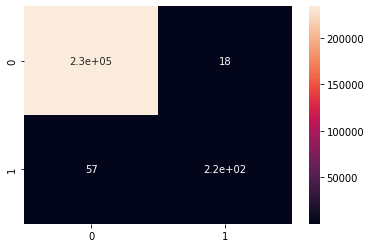

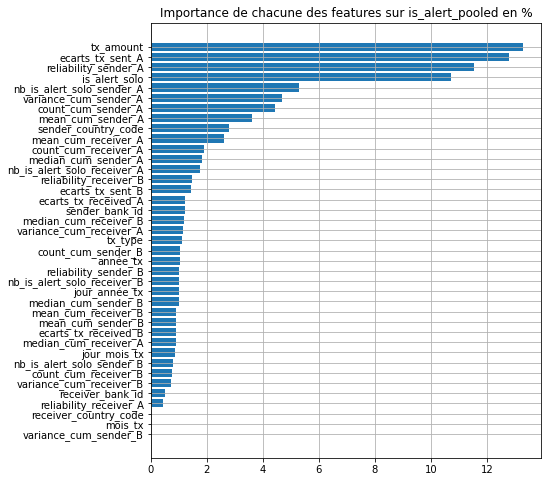

[0.7934782608695652, 0.8538011695906433, 0.9240506329113924]

In [15]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300

evaluation_classifier(df_bis, time, delta, StandardScaler(), xgb.XGBClassifier(), False, True, True  )

% Test/(Test + Train) : 27.411975868540644
Original dataset shape Counter({0: 619589, 1: 786})
Resampled dataset shape Counter({0: 619589, 1: 185876})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    619589
           1       1.00      1.00      1.00    185876

    accuracy                           1.00    805465
   macro avg       1.00      1.00      1.00    805465
weighted avg       1.00      1.00      1.00    805465

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    234001
           1       0.93      0.79      0.85       276

    accuracy                           1.00    234277
   macro avg       0.96      0.89      0.93    234277
weighted avg       1.00      1.00      1.00    234277



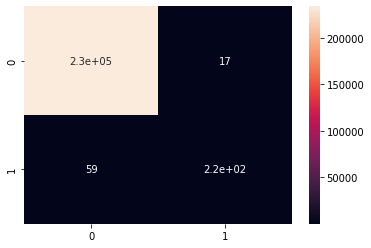

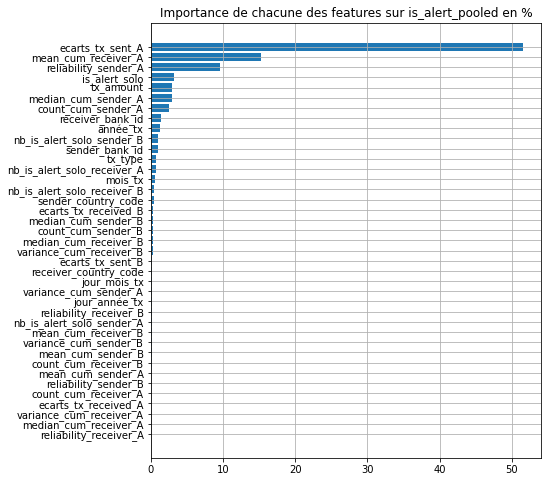

[0.7862318840579711, 0.8509803921568628, 0.9273504273504274]

In [16]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300

evaluation_classifier(df_bis, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True, True  )

# Comparaison avec et sans les infos ajoutées 

## Pour B 

In [23]:
# On fait le tri dans les variables 
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 

       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B',

       'ecarts_tx_received_B',
       'ecarts_tx_sent_B',

       'sender_bank_id','receiver_bank_id', 
       'is_alert_pooled',
        
        'is_alert_solo',

       'reliability_receiver_B', 
       'reliability_sender_B', 

       'nb_is_alert_solo_sender_B', 'nb_is_alert_solo_receiver_B']

df_bis2= df_bis[variables_to_keep].copy()

num_cols= ['tx_amount',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 
       'ecarts_tx_received_B',
       'ecarts_tx_sent_B', 'reliability_receiver_B', 
       'reliability_sender_B', 

       'nb_is_alert_solo_sender_B', 'nb_is_alert_solo_receiver_B' ]

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'tx_type', 'is_alert_solo']

### RF 

458051
% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    262150
           1       1.00      1.00      1.00     78645

    accuracy                           1.00    340795
   macro avg       1.00      1.00      1.00    340795
weighted avg       1.00      1.00      1.00    340795

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98263
           1       0.62      0.53      0.57       135

    accuracy                           1.00     98398
   macro avg       0.81      0.77      0.79     98398
weighted avg       1.00      1.00      1.00     98398



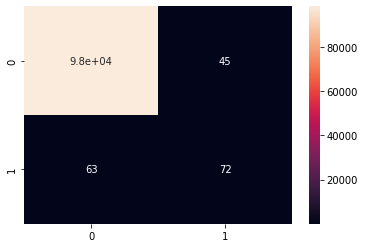

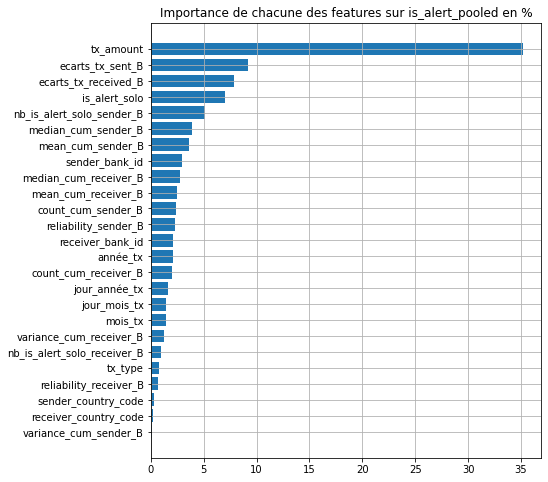

[0.5333333333333333, 0.5714285714285715, 0.6153846153846154]

In [24]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300

#On enlève les différentes banques 
df3 = df_bis2[(df_bis2['sender_bank_id']== 1 )|((df_bis2['receiver_bank_id'] == 1 ))] #on met maintenant 1 car il s'agit de la banque B 

print(len(df3))

evaluation_classifier(df3, time, delta, StandardScaler(), RandomForestClassifier(), True, True, True)

### XGB

458051
% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    262150
           1       1.00      1.00      1.00     78645

    accuracy                           1.00    340795
   macro avg       1.00      1.00      1.00    340795
weighted avg       1.00      1.00      1.00    340795

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98263
           1       0.85      0.50      0.63       135

    accuracy                           1.00     98398
   macro avg       0.92      0.75      0.82     98398
weighted avg       1.00      1.00      1.00     98398



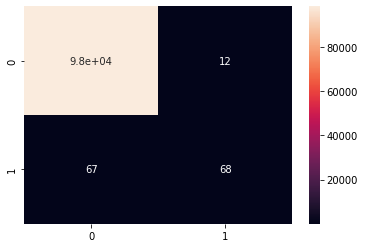

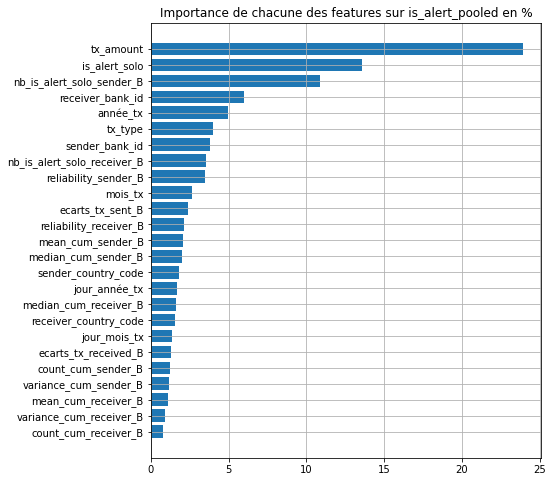

[0.5037037037037037, 0.6325581395348837, 0.85]

In [25]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300

#On enlève les différentes banques 
df3 = df_bis2[(df_bis2['sender_bank_id']== 1 )|((df_bis2['receiver_bank_id'] == 1 ))] #on met maintenant 1 car il s'agit de la banque B 

print(len(df3))

evaluation_classifier(df3, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True, True)

# Avec toutes les infos 

In [20]:
num_cols= ['tx_amount',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B']

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'is_alert_solo', 'tx_type']
df_B_bis= df_bis[(df_bis['sender_bank_id']== 1 )|((df_bis['receiver_bank_id'] == 1 ))] #on met maintenant 1 car il s'agit de la banque B 


% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    262150
           1       1.00      1.00      1.00     78645

    accuracy                           1.00    340795
   macro avg       1.00      1.00      1.00    340795
weighted avg       1.00      1.00      1.00    340795

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98263
           1       0.89      0.59      0.71       135

    accuracy                           1.00     98398
   macro avg       0.94      0.80      0.86     98398
weighted avg       1.00      1.00      1.00     98398



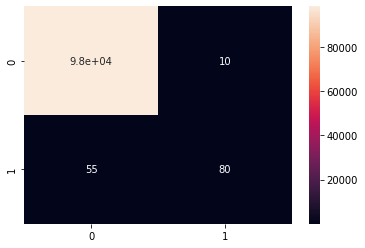

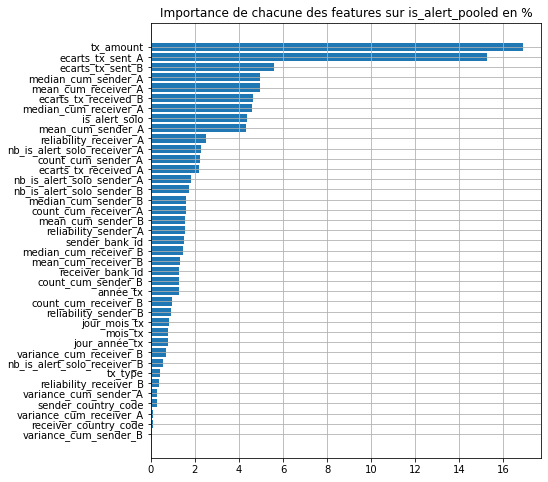

[0.5925925925925926, 0.711111111111111, 0.8888888888888888]

In [27]:
df_B_bis= df_bis[(df_bis['sender_bank_id']== 1 )|((df_bis['receiver_bank_id'] == 1 ))] #on met maintenant 1 car il s'agit de la banque B 
evaluation_classifier(df_B_bis, time, delta, StandardScaler(), RandomForestClassifier(max_depth=10), True, True, True)

% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    262150
           1       1.00      1.00      1.00     78645

    accuracy                           1.00    340795
   macro avg       1.00      1.00      1.00    340795
weighted avg       1.00      1.00      1.00    340795

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98263
           1       1.00      0.61      0.76       135

    accuracy                           1.00     98398
   macro avg       1.00      0.80      0.88     98398
weighted avg       1.00      1.00      1.00     98398



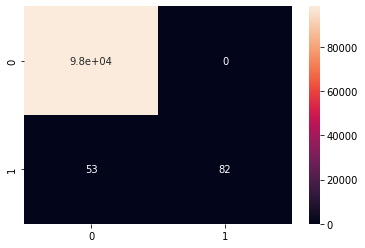

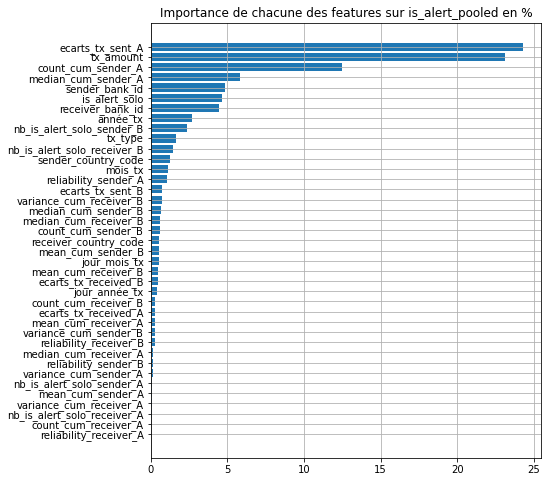

[0.6074074074074074, 0.7557603686635944, 1.0]

In [28]:
evaluation_classifier(df_B_bis, time, delta, StandardScaler(), xgb.XGBClassifier(), True, True, True)

In [13]:
from tqdm import tqdm 

In [84]:
def mesure_plus_value(n_iter, dataframe, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, n_train,n_test,scaler_,SMote, classifier_):
    # on va stocker les métriques
    Liste_recall_enrichi =[]
    Liste_recall_alone=[]

    Liste_precision_enrichi =[]
    Liste_precision_alone=[]

    Liste_f1_enrichi =[]
    Liste_f1_alone=[]

    # n_iter : nb de répétitions i.e. de nouveaux X_train, y_train, X_test, y_test
    # enrichi fait référence aux lignes avec TOUTES les variables A ET B 
    # alone fait référence aux lignes avec uniquement les variables propres à B ou A 

    #On sépare test et train avec une date et un horizon 
    X_train_enrichi, X_test_enrichi, y_train_1, y_test_1 = prep_train_test_bis(dataframe, time, delta, scaler_, SMote,num_cols, cat_cols)
    X_train_alone, X_test_alone, y_train_2, y_test_2 = prep_train_test_bis(dataframe, time, delta, scaler_, SMote,num_cols2, cat_cols2)

    y_train= y_train_1
    y_test= y_test_1

    # n_iter : nb de répétitions i.e. de nouveaux X_train_tirés, y_train_tirés, X_test_tirés, y_test_tirés
    for i in tqdm(range(n_iter)):

        # on vient faire du bootstrap pour avoir indépendance entre les échantillons
        indices_train = np.random.choice(len(X_train_enrichi), size=n_train, replace=True)
        X_train_enrichi_2 = X_train_enrichi.iloc[indices_train].copy()
        X_train_alone_2 = X_train_alone.iloc[indices_train].copy()

        y_train_sample = y_train.iloc[indices_train]

        indices_test = np.random.choice(len(X_test_enrichi), size=n_test, replace=True)
        X_test_enrichi_2 = X_test_enrichi.iloc[indices_test].copy()
        X_test_alone_2= X_test_alone.iloc[indices_test].copy()

        y_test_sample = y_test.iloc[indices_test]


        liste_recall_enrichi =[]
        liste_recall_alone=[]

        liste_precision_enrichi =[]
        liste_precision_alone=[]

        liste_f1_enrichi =[]
        liste_f1_alone=[]

        #display(X_train_enrichi, X_train_alone ,y_train_sample)
        #display(X_test_enrichi, X_test_alone ,y_test_sample)

        # On va estimer plusieurs fois recall, précision et f1, ici 5 fois on va faire une moyenne et on va l'ajouter à notre liste MAJUSCULE
        for j in tqdm(range(5)):
            model=classifier_
            model.fit(X_train_enrichi_2, y_train_sample) 
            predictions_enrichi= model.predict(X_test_enrichi_2)
            
            #print('test enrichi')
            #print(classification_report(y_test_sample,predictions_enrichi))
            #plt.show(sns.heatmap(confusion_matrix(y_test_sample,predictions_enrichi),annot=True))

            liste_recall_enrichi.append(recall_score(y_test_sample, predictions_enrichi , pos_label=1, average='binary'))
            liste_precision_enrichi.append(precision_score(y_test_sample, predictions_enrichi , pos_label=1, average='binary'))
            liste_f1_enrichi.append(f1_score(y_test_sample, predictions_enrichi , pos_label=1, average='binary'))

            model=classifier_
            model.fit(X_train_alone_2, y_train_sample) 
            predictions_alone= model.predict(X_test_alone_2)

            #print('test alone ')
            #print(classification_report(y_test_sample,predictions_alone))
            #plt.show(sns.heatmap(confusion_matrix(y_test_sample,predictions_alone),annot=True))
            liste_recall_alone.append(recall_score(y_test_sample, predictions_alone , pos_label=1, average='binary'))
            liste_precision_alone.append(precision_score(y_test_sample, predictions_alone , pos_label=1, average='binary'))
            liste_f1_alone.append(f1_score(y_test_sample, predictions_alone , pos_label=1, average='binary'))


        #On ajoute la moyenne des métriques estimées pour chacun
        Liste_recall_enrichi.append(np.mean(liste_recall_enrichi))
        Liste_precision_enrichi.append(np.mean(liste_precision_enrichi))
        Liste_f1_enrichi.append(np.mean(liste_f1_enrichi))

        Liste_recall_alone.append(np.mean(liste_recall_alone))
        Liste_precision_alone.append(np.mean(liste_precision_alone))
        Liste_f1_alone.append(np.mean(liste_f1_alone))


    return(Liste_recall_enrichi,Liste_recall_alone,Liste_precision_enrichi,Liste_precision_alone,Liste_f1_enrichi,Liste_f1_alone)

def mesure_plus_value_bis(n_iter, n_iter_bis, dataframe, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, n_train,n_test,scaler_,SMote, classifier_):
    # on va stocker les métriques
    Liste_recall_enrichi =[]
    Liste_recall_alone=[]

    Liste_precision_enrichi =[]
    Liste_precision_alone=[]

    Liste_f1_enrichi =[]
    Liste_f1_alone=[]

    # n_iter : nb de répétitions i.e. de nouveaux X_train, y_train, X_test, y_test
    # enrichi fait référence aux lignes avec TOUTES les variables A ET B 
    # alone fait référence aux lignes avec uniquement les variables propres à B ou A 

    #On sépare test et train avec une date et un horizon 
    X_train_enrichi, X_test_enrichi, y_train_1, y_test_1 = prep_train_test_bis(dataframe, time, delta, scaler_, SMote,num_cols, cat_cols)
    X_train_alone, X_test_alone, y_train_2, y_test_2 = prep_train_test_bis(dataframe, time, delta, scaler_, SMote,num_cols2, cat_cols2)

    y_train= y_train_1
    y_test= y_test_1

    # n_iter : nb de répétitions i.e. de nouveaux X_train_tirés, y_train_tirés, X_test_tirés, y_test_tirés
    for i in tqdm(range(n_iter)):

        # on vient faire du bootstrap pour avoir indépendance entre les échantillons
        indices_train = np.random.choice(len(X_train_enrichi), size=n_train, replace=True)
        X_train_enrichi_2 = X_train_enrichi.iloc[indices_train].copy()
        X_train_alone_2 = X_train_alone.iloc[indices_train].copy()

        y_train_sample = y_train.iloc[indices_train]

        indices_test = np.random.choice(len(X_test_enrichi), size=n_test, replace=True)
        X_test_enrichi_2 = X_test_enrichi.iloc[indices_test].copy()
        X_test_alone_2= X_test_alone.iloc[indices_test].copy()

        y_test_sample = y_test.iloc[indices_test]


        liste_recall_enrichi =[]
        liste_recall_alone=[]

        liste_precision_enrichi =[]
        liste_precision_alone=[]

        liste_f1_enrichi =[]
        liste_f1_alone=[]

        #display(X_train_enrichi, X_train_alone ,y_train_sample)
        #display(X_test_enrichi, X_test_alone ,y_test_sample)

        # On va estimer plusieurs fois recall, précision et f1, ici 5 fois on va faire une moyenne et on va l'ajouter à notre liste MAJUSCULE
        for j in tqdm(range(n_iter_bis)):
            model=classifier_
            model.fit(X_train_enrichi_2, y_train_sample) 
            predictions_enrichi= model.predict(X_test_enrichi_2)
            
            #print('test enrichi')
            #print(classification_report(y_test_sample,predictions_enrichi))
            #plt.show(sns.heatmap(confusion_matrix(y_test_sample,predictions_enrichi),annot=True))

            liste_recall_enrichi.append(recall_score(y_test_sample, predictions_enrichi , pos_label=1, average='binary'))
            liste_precision_enrichi.append(precision_score(y_test_sample, predictions_enrichi , pos_label=1, average='binary'))
            liste_f1_enrichi.append(f1_score(y_test_sample, predictions_enrichi , pos_label=1, average='binary'))

            model=classifier_
            model.fit(X_train_alone_2, y_train_sample) 
            predictions_alone= model.predict(X_test_alone_2)

            #print('test alone ')
            #print(classification_report(y_test_sample,predictions_alone))
            #plt.show(sns.heatmap(confusion_matrix(y_test_sample,predictions_alone),annot=True))
            liste_recall_alone.append(recall_score(y_test_sample, predictions_alone , pos_label=1, average='binary'))
            liste_precision_alone.append(precision_score(y_test_sample, predictions_alone , pos_label=1, average='binary'))
            liste_f1_alone.append(f1_score(y_test_sample, predictions_alone , pos_label=1, average='binary'))


        #On ajoute la moyenne des métriques estimées pour chacun
        Liste_recall_enrichi.append(np.mean(liste_recall_enrichi))
        Liste_precision_enrichi.append(np.mean(liste_precision_enrichi))
        Liste_f1_enrichi.append(np.mean(liste_f1_enrichi))

        Liste_recall_alone.append(np.mean(liste_recall_alone))
        Liste_precision_alone.append(np.mean(liste_precision_alone))
        Liste_f1_alone.append(np.mean(liste_f1_alone))


    return(Liste_recall_enrichi,Liste_recall_alone,Liste_precision_enrichi,Liste_precision_alone,Liste_f1_enrichi,Liste_f1_alone)
    

In [29]:
def prep_train_test_bis(df_to_split, time, delta, scaler_, SMote,n_cols, c_cols):
    "fonction qui renvoie juste X_train, X_test, y_train, y_test "
    "scaler_: le scaler à utiliser, mettre 'False' si on ne veut pas scaler "
    "SMote : True ou False"

    X_train, X_test, y_train, y_test = train_test_split_time(df_to_split,time,delta)


    #Resampling 
    if SMote == True : 
        
        print('Original dataset shape %s' % Counter(y_train))
        sm = SMOTE(sampling_strategy= 0.3) #rapport classe minoritaire sur classe majoritaire
        X_train, y_train = sm.fit_resample(X_train, y_train)
        print('Resampled dataset shape %s' % Counter(y_train))

    #Scaling
    if scaler_ != False : 
        scaler=scaler_
        #X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
        #X_test= scaler.transform(X_test)
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[n_cols]),index=X_train.index, columns= n_cols)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test[n_cols]),index=X_test.index, columns= n_cols)

        X_train = pd.concat([X_train_scaled,X_train[c_cols]],axis=1)
        X_test = pd.concat([X_test_scaled,X_test[c_cols]],axis=1)
    return(X_train, X_test, y_train, y_test)

In [30]:
num_cols= ['tx_amount',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B']

cat_cols= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'is_alert_solo', 'tx_type']

In [31]:
num_cols2= ['tx_amount',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 
       'ecarts_tx_received_B',
       'ecarts_tx_sent_B', 'reliability_receiver_B', 
       'reliability_sender_B', 

       'nb_is_alert_solo_sender_B', 'nb_is_alert_solo_receiver_B' ]

cat_cols2= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'tx_type', 'is_alert_solo']

num_cols3= ['tx_amount',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 
       'ecarts_tx_received_A',
       'ecarts_tx_sent_A', 'reliability_receiver_A', 
       'reliability_sender_A', 

       'nb_is_alert_solo_sender_A', 'nb_is_alert_solo_receiver_A' ]

cat_cols3= ['sender_country_code', 'receiver_country_code',
       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',
       'sender_bank_id', 'receiver_bank_id', 'tx_type', 'is_alert_solo']

Pour un random forest 

In [32]:
#On fixe la date initiale
time = datetime.datetime(2020, 5, 16)
#On fixe l'horizon
delta= 300

L= mesure_plus_value(10, df_B_bis, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, 70000,30000,StandardScaler(),True, RandomForestClassifier(max_depth=10))

% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})


100%|██████████| 10/10 [11:34<00:00, 69.46s/it]


In [33]:
print('Recall')
print(L[0])
print(L[1])
print('Precision')
print(L[2])
print(L[3])
print('f1')
print(L[4])
print(L[5])

Recall
[0.5653846153846154, 0.6909090909090909, 0.7842105263157896, 0.7189189189189189, 0.6375, 0.5153846153846153, 0.6654545454545454, 0.6465116279069768, 0.7371428571428572, 0.6256410256410256]
[0.7153846153846154, 0.690909090909091, 0.7157894736842105, 0.6972972972972973, 0.6125, 0.5461538461538462, 0.6836363636363636, 0.6046511627906976, 0.7485714285714286, 0.6307692307692309]
Precision
[0.577815161777426, 0.6548626373626373, 0.6575797908096044, 0.5136087193440583, 0.4711651019798399, 0.39428624480095065, 0.4849477578328063, 0.4836943627107562, 0.5766803486368703, 0.5147576291304514]
[0.33943675101170356, 0.35328714170966724, 0.31788200577220416, 0.2758999158871064, 0.2009446103584934, 0.21707685545719388, 0.49518586033272244, 0.30419786717926967, 0.34719177273443325, 0.2657744464827129]
f1
[0.5707624922247563, 0.6697338217338217, 0.7148706395930955, 0.5967824616543979, 0.5413833331166981, 0.4465832916344846, 0.5607260311176685, 0.5527528338257468, 0.6444603639784363, 0.56276269539

In [ ]:
L_bis= mesure_plus_value(10, df_B_bis, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, 70000,30000,StandardScaler(),False, RandomForestClassifier(max_depth=10))

In [ ]:
print('Recall')
print(L_bis[0])
print(L_bis[1])
print('Precision')
print(L_bis[2])
print(L_bis[3])
print('f1')
print(L_bis[4])
print(L_bis[5])

Pour xgb 

In [36]:
L2= mesure_plus_value(10, df_B_bis, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, 70000,30000,StandardScaler(),True, xgb.XGBClassifier())

% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})


100%|██████████| 10/10 [09:08<00:00, 54.89s/it]


In [41]:
print('Recall')
print(L2[0])
print(L2[1])
print('Precision')
print(L2[2])
print(L2[3])
print('f1')
print(L2[4])
print(L2[5])


Recall
[0.5609756097560976, 0.7058823529411765, 0.7073170731707317, 0.5535714285714286, 0.6666666666666666, 0.5675675675675675, 0.5476190476190477, 0.5681818181818182, 0.6428571428571429, 0.5135135135135135]
[0.5853658536585366, 0.6764705882352942, 0.6341463414634146, 0.4642857142857143, 0.6363636363636364, 0.5405405405405406, 0.47619047619047616, 0.5454545454545454, 0.5178571428571429, 0.5135135135135135]
Precision
[0.7931034482758621, 1.0, 0.8529411764705882, 0.96875, 1.0, 0.8076923076923077, 0.9583333333333334, 1.0, 0.9230769230769231, 0.9047619047619048]
[0.6486486486486487, 0.5476190476190477, 0.7647058823529411, 0.8125, 0.875, 0.7692307692307693, 0.7692307692307693, 0.8571428571428571, 0.7837837837837838, 0.6551724137931034]
f1
[0.6571428571428573, 0.8275862068965518, 0.7733333333333334, 0.7045454545454546, 0.8, 0.6666666666666666, 0.696969696969697, 0.7246376811594203, 0.7578947368421053, 0.6551724137931034]
[0.6153846153846153, 0.605263157894737, 0.6933333333333332, 0.590909090

In [71]:
L3= mesure_plus_value(100, df_B_bis, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, 70000,30000,StandardScaler(),True, xgb.XGBClassifier())

% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})


100%|██████████| 100/100 [1:28:18<00:00, 52.98s/it]


In [73]:
Diff_Recall_xgb3 = [L3[0][i]-L3[1][i] for i in range(len(L3[0]))]
Diff_Recall_xgb3

[0.040000000000000036,
 0.0,
 0.1111111111111111,
 0.05128205128205132,
 0.043478260869565244,
 -0.023809523809523836,
 -0.022222222222222254,
 0.04651162790697683,
 0.1875,
 0.02564102564102566,
 0.14634146341463405,
 0.0,
 0.11111111111111105,
 0.17142857142857149,
 0.0888888888888889,
 0.11764705882352938,
 0.04878048780487798,
 -0.103448275862069,
 0.11538461538461542,
 0.040000000000000036,
 0.09523809523809523,
 0.10869565217391308,
 0.11764705882352944,
 0.0,
 -0.04651162790697683,
 0.07272727272727275,
 0.09999999999999998,
 0.10416666666666663,
 0.10869565217391308,
 0.13333333333333325,
 0.19565217391304357,
 0.045454545454545525,
 0.22500000000000003,
 0.04166666666666663,
 0.10526315789473689,
 0.023809523809523725,
 -0.08108108108108103,
 0.07317073170731714,
 0.037735849056603765,
 0.10810810810810811,
 0.04347826086956519,
 0.05555555555555558,
 0.07692307692307687,
 0.05263157894736842,
 0.09756097560975607,
 0.1568627450980392,
 0.045454545454545414,
 0.0,
 0.090909090

Text(0.5, 0, 'Valeurs')

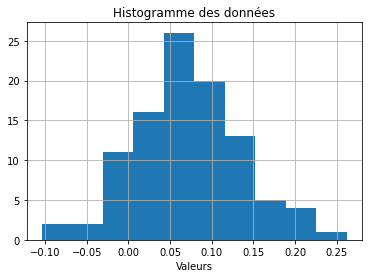

In [80]:
plt.hist(Diff_Recall_xgb3)
plt.grid()
# Ajouter un titre et des labels pour les axes
plt.title("Histogramme des données")
plt.xlabel("Valeurs")

In [81]:
shapiro(Diff_Recall_xgb3)

ShapiroResult(statistic=0.9905128479003906, pvalue=0.7060284614562988)

In [82]:
print(ttest_1samp(Diff_Recall_xgb3, 0, alternative = 'greater'))

Ttest_1sampResult(statistic=11.273992957850007, pvalue=9.323301008094391e-20)


Maintenant dans la 2ème boucle for, on met n_iter_bis et non plus 5 

In [85]:
L4= mesure_plus_value_bis(100, 10, df_B_bis, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, 70000,30000,StandardScaler(),True, xgb.XGBClassifier())

% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})
% Test/(Test + Train) : 27.267562856612383
Original dataset shape Counter({0: 262150, 1: 313})
Resampled dataset shape Counter({0: 262150, 1: 78645})


100%|██████████| 100/100 [3:24:23<00:00, 122.63s/it]


In [86]:
Diff_Recall_xgb4 = [L4[0][i]-L4[1][i] for i in range(len(L4[0]))]
Diff_Recall_xgb4

[0.0,
 0.08571428571428563,
 0.025641025641025883,
 -0.01851851851851849,
 0.10256410256410264,
 0.125,
 0.1707317073170732,
 0.07142857142857129,
 0.04878048780487809,
 0.06818181818181823,
 0.09523809523809534,
 0.05555555555555547,
 0.0,
 0.06451612903225801,
 0.02083333333333326,
 0.10000000000000009,
 -0.04761904761904745,
 0.16279069767441856,
 0.0434782608695653,
 0.09756097560975585,
 -0.06521739130434778,
 0.09523809523809534,
 0.1399999999999998,
 0.09090909090909083,
 0.030303030303030276,
 0.13043478260869562,
 0.08888888888888868,
 0.09523809523809512,
 0.11904761904761885,
 0.16326530612244872,
 0.039215686274509776,
 0.0,
 0.125,
 0.04651162790697683,
 0.19047619047619035,
 0.09999999999999987,
 0.08888888888888902,
 0.0,
 0.148936170212766,
 0.17142857142857149,
 0.02564102564102566,
 -0.02631578947368418,
 0.0,
 -0.06451612903225823,
 -0.02173913043478254,
 0.039215686274509776,
 0.020408163265306034,
 0.10526315789473695,
 0.07692307692307687,
 0.051282051282051155,
 

In [87]:
def affichage_tests(Liste):
    Delta = [Liste[0][i]-Liste[1][i] for i in range(len(Liste[0]))]
    plt.hist(Delta)
    plt.grid()
    # Ajouter un titre et des labels pour les axes
    plt.title("Histogramme des données")
    plt.xlabel("Valeurs")
    plt.show()
    print("Shapiro")
    print(shapiro(Delta))
    print("T-test")
    print(ttest_1samp(Delta, 0, alternative = 'greater'))

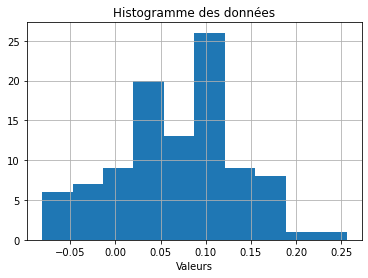

Shapiro
ShapiroResult(statistic=0.9864898920059204, pvalue=0.40424591302871704)
T-test
Ttest_1sampResult(statistic=10.24148208676157, pvalue=1.6271153433302104e-17)


In [88]:
affichage_tests(L4)

In [ ]:
L5= mesure_plus_value(1000, df_B_bis, time, delta, num_cols, cat_cols,num_cols2, cat_cols2, 70000,30000,StandardScaler(),True, xgb.XGBClassifier())

In [ ]:
affichage_tests(L5)

# On fait la différence

On va vérifier que la différence est normalement distribuée en utilisant un test de Shapiro-Wilk 

In [42]:
Diff_Recall_xgb = [L2[0][i]-L2[1][i] for i in range(len(L2[0]))]
Diff_Recall_xgb

[-0.024390243902438935,
 0.02941176470588236,
 0.07317073170731703,
 0.0892857142857143,
 0.030303030303030276,
 0.027027027027026973,
 0.07142857142857151,
 0.022727272727272818,
 0.125,
 0.0]

Text(0.5, 0, 'Valeurs')

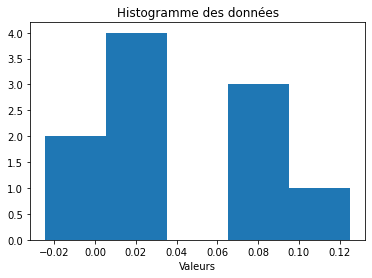

In [70]:
plt.hist(Diff_Recall_xgb, bins=5)

# Ajouter un titre et des labels pour les axes
plt.title("Histogramme des données")
plt.xlabel("Valeurs")

In [43]:
from scipy.stats import shapiro

In [62]:
shapiro(Diff_Recall_xgb)

ShapiroResult(statistic=0.9606499671936035, pvalue=0.7932583093643188)

On ne peut pas rejeter l'hypothèse nulle : et donc on accepte la non normalité !

In [54]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel

In [61]:
print(ttest_1samp(Diff_Recall_xgb, 0, alternative = 'greater'))
print(ttest_rel(L2[1],L2[0] ,alternative = 'greater'))

Ttest_1sampResult(statistic=3.142115338846833, pvalue=0.0059437347783765585)
Ttest_relResult(statistic=-3.142115338846833, pvalue=0.9940562652216234)


## Pour A 

In [64]:
df_A_bis= df_bis[(df_bis['sender_bank_id']== 0 )|((df_bis['receiver_bank_id'] == 0 ))] #on met 0 car il s'agit de la banque A

L_A= mesure_plus_value_bis(100,10, df_A_bis, time, delta, num_cols, cat_cols,num_cols3, cat_cols3, 70000,30000,StandardScaler(),True, RandomForestClassifier())

% Test/(Test + Train) : 27.477358975521994
Original dataset shape Counter({0: 479062, 1: 610})
Resampled dataset shape Counter({0: 479062, 1: 143718})
% Test/(Test + Train) : 27.477358975521994
Original dataset shape Counter({0: 479062, 1: 610})
Resampled dataset shape Counter({0: 479062, 1: 143718})


100%|██████████| 10/10 [11:07<00:00, 66.78s/it]


In [66]:
print(L_A[0])
print(L_A[1])

[1.0, 1.0, 0.9743589743589742, 0.9230769230769231, 0.962962962962963, 0.9379310344827585, 0.9741935483870968, 0.9583333333333334, 0.993103448275862, 1.0]
[1.0, 1.0, 0.9538461538461538, 0.917948717948718, 0.8962962962962961, 0.9241379310344827, 0.9741935483870968, 0.975, 1.0, 0.9714285714285715]


In [67]:
Diff_Recall_L_A = [L_A[0][i]-L_A[1][i] for i in range(len(L_A[0]))]
Diff_Recall_L_A

[0.0,
 0.0,
 0.02051282051282044,
 0.00512820512820511,
 0.06666666666666687,
 0.013793103448275779,
 0.0,
 -0.016666666666666607,
 -0.006896551724137945,
 0.02857142857142847]

In [68]:
shapiro(Diff_Recall_L_A)

ShapiroResult(statistic=0.8671562671661377, pvalue=0.0926063284277916)

In [69]:
print(ttest_1samp(Diff_Recall_xgb, 0, alternative = 'greater'))

Ttest_1sampResult(statistic=3.142115338846833, pvalue=0.0059437347783765585)
